## 모바일 고객 이탈 예측

### 패키지 불러오기

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 불러오기

[데이터 정보](http://didawiki.di.unipi.it/doku.php/dm/mains.santanna.dm4crm.2012)

In [3]:
mobile = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv")

In [4]:
mobile.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [5]:
mobile.describe()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.502400,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250
std,5773.647028,0.500007,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558
min,1.000000,0.000000,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000
25%,5000.750000,0.000000,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000
50%,10000.500000,1.000000,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000
75%,15000.250000,1.000000,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000
max,20000.000000,1.000000,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000


In [6]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           20000 non-null  int64 
 1   COLLEGE                      20000 non-null  int64 
 2   INCOME                       20000 non-null  int64 
 3   OVERAGE                      20000 non-null  int64 
 4   LEFTOVER                     20000 non-null  int64 
 5   HOUSE                        20000 non-null  int64 
 6   HANDSET_PRICE                20000 non-null  int64 
 7   OVER_15MINS_CALLS_PER_MONTH  20000 non-null  int64 
 8   AVERAGE_CALL_DURATION        20000 non-null  int64 
 9   REPORTED_SATISFACTION        20000 non-null  object
 10  REPORTED_USAGE_LEVEL         20000 non-null  object
 11  CONSIDERING_CHANGE_OF_PLAN   20000 non-null  object
 12  CHURN                        20000 non-null  object
dtypes: int64(9), object(4)
memory u

### Dummy Variable

In [7]:
xy = pd.get_dummies(mobile, columns=['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN'], drop_first=True)

xy.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,CHURN,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,1,0,31953,0,6,313378,161,0,4,STAY,0,1,0,0,0,1,0,0,0,0,1,0
1,2,1,36147,0,13,800586,244,0,6,STAY,0,1,0,0,0,1,0,0,1,0,0,0
2,3,1,27273,230,0,305049,201,16,15,STAY,0,1,0,0,0,0,0,1,0,0,0,1
3,4,0,120070,38,33,788235,780,3,2,LEAVE,0,1,0,0,0,0,1,0,1,0,0,0
4,5,1,29215,208,85,224784,241,21,1,STAY,0,0,0,1,0,1,0,0,0,1,0,0


In [8]:
y = xy[['CHURN']]

y.head()

,CHURN
0,STAY
1,STAY
2,STAY
3,LEAVE
4,STAY


In [9]:
y = y.replace(['STAY', 'LEAVE'], [0, 1])

y.head()

,CHURN
0,0
1,0
2,0
3,1
4,0


In [10]:
x = xy.drop(['id','CHURN'], axis=1)

x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,31953,0,6,313378,161,0,4,0,1,0,0,0,1,0,0,0,0,1,0
1,1,36147,0,13,800586,244,0,6,0,1,0,0,0,1,0,0,1,0,0,0
2,1,27273,230,0,305049,201,16,15,0,1,0,0,0,0,0,1,0,0,0,1
3,0,120070,38,33,788235,780,3,2,0,1,0,0,0,0,1,0,1,0,0,0
4,1,29215,208,85,224784,241,21,1,0,0,0,1,0,1,0,0,0,1,0,0


In [11]:
x.shape, y.shape

((20000, 20), (20000, 1))

### Q1. Data Split

    x_train, y_train, x_test, y_test 4개의 변수에 train set / test set으로 분할하세요.

    test_size는 0.2로 지정하세요.



In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2021)

### Q2. Scaling

    Standardization 을 하세요.
    * Hint : 평균이 0, 표준편차가 1이 되는지 확인하세요.

In [20]:
x_train_sc.shape, y_train.shape

((16000, 20), (16000, 1))

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col_numeric = x_train.columns[1:8]

x_train_sc = x_train.copy()
x_test_sc = x_test.copy()

x_train_sc[col_numeric] = scaler.fit_transform(x_train[col_numeric])
x_test_sc[col_numeric] = scaler.fit_transform(x_test[col_numeric])

In [19]:
pd.DataFrame(x_train_sc)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
12249,1,1.869399,-0.999115,-0.889689,-0.960893,2.307785,-0.781835,1.137251,0,0,0,1,0,0,1,0,0,0,0,0
8772,0,-0.807735,-0.486586,-0.889689,1.868542,-0.918978,-0.333780,0.455284,0,0,0,1,0,1,0,0,1,0,0,0
16415,1,0.365785,-0.999115,-0.443337,-1.006377,-0.008386,0.786358,-0.226683,0,0,0,1,0,0,0,1,1,0,0,0
5281,0,-1.275293,-0.172079,-0.889689,-0.788874,1.457900,-0.445794,0.000639,0,0,0,1,0,1,0,0,0,0,0,1
10664,0,1.322988,-0.591421,-0.406141,-0.941703,1.490588,-0.333780,-0.454005,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18781,0,-1.323199,1.703311,-0.294553,-0.277063,-0.783557,1.458440,-0.226683,0,0,0,1,0,1,0,0,1,0,0,0
16347,1,-1.386985,-0.999115,0.263387,0.503328,-0.802235,0.226289,-1.135972,0,0,1,0,0,0,0,1,1,0,0,0
2669,1,-1.327654,-0.999115,-0.889689,-0.143167,-0.708841,-0.781835,0.455284,0,1,0,0,0,1,0,0,1,0,0,0
17536,1,-1.039071,-0.999115,0.709739,-0.877516,2.191043,-0.893849,-0.908650,0,0,0,1,0,0,1,0,0,0,1,0


### Q3. **Sequential API**

    Sequential API로 모델링 하세요.

    히든 레이어 2개를 포함하여 모델링 하세요. (각 히든 레이어 노드 32개, 16개)

* 모델 선언

In [21]:
x_train.shape, y_train.shape

((16000, 20), (16000, 1))

In [29]:
# 1. 세션 초기화
keras.backend.clear_session()

# 2. 모델 발판 생성
model = keras.models.Sequential()

# 3. 모델 블록 조립
model.add(keras.layers.Dense(32, input_shape=(20, )))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 4. 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [30]:
from tensorflow.keras.utils import plot_model

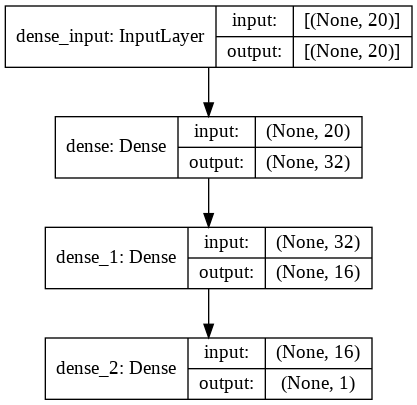

In [31]:
plot_model(model, show_shapes=True)

* 모델 학습

        .fit 과정을 hist 변수에 담으세요.

        epochs = 30, validation_split = 0.2으로 설정하세요!

In [32]:
hist = model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
400/400 [==============================] - 1s 2ms/step - loss: 4649.2880 - accuracy: 0.5396 - val_loss: 15.7316 - val_accuracy: 0.4881
Epoch 2/30
400/400 [==============================] - 1s 1ms/step - loss: 23.4360 - accuracy: 0.5347 - val_loss: 18.6751 - val_accuracy: 0.4881
Epoch 3/30
400/400 [==============================] - 1s 1ms/step - loss: 21.9093 - accuracy: 0.5310 - val_loss: 7.2585 - val_accuracy: 0.6100
Epoch 4/30
400/400 [==============================] - 1s 1ms/step - loss: 18.4621 - accuracy: 0.5378 - val_loss: 54.4776 - val_accuracy: 0.4888
Epoch 5/30
400/400 [==============================] - 1s 2ms/step - loss: 24.4486 - accuracy: 0.5363 - val_loss: 17.6402 - val_accuracy: 0.4888
Epoch 6/30
400/400 [==============================] - 1s 1ms/step - loss: 18.3561 - accuracy: 0.5355 - val_loss: 4.2991 - val_accuracy: 0.6331
Epoch 7/30
400/400 [==============================] - 1s 1ms/step - loss: 11.1176 - accuracy: 0.5459 - val_loss: 32.0504 - val_accuracy:

* 학습 과정 plot으로 보기

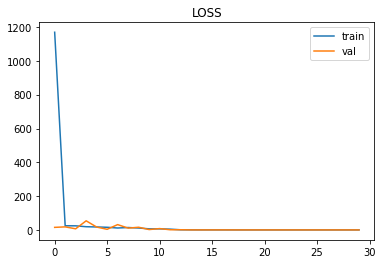

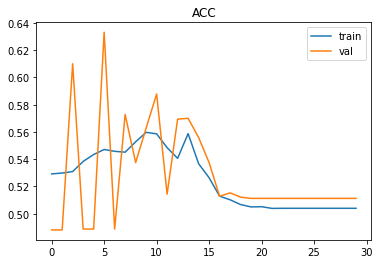

In [33]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('LOSS')
plt.legend(['train', 'val'])
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('ACC')
plt.legend(['train', 'val'])
plt.show()

* 모델 예측


In [34]:
y_test_pred = model.predict(x_test_sc)

* 모델 평가

        accuracy_score를 사용하세요!

In [ ]:
from sklearn.metrics import accuracy_score

### Q3+α **Functional API**

    Functional API로 모델링 하세요.

    히든 레이어 2개를 포함하여 모델링 하세요. (각 히든 레이어 노드 32개, 16개)

* 모델 선언

In [ ]:
# 1. 세션 초기화


# 2. 모델 정의


# 3. 모델의 시작과 끝 지정


# 4. 모델 컴파일



In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
plot_model(model, show_shapes=True)

* 모델 학습

        .fit 과정을 hist 변수에 담으세요.

        epochs = 30, validation_split = 0.2으로 설정하세요!

In [ ]:
hist = 

* 학습 과정 plot으로 보기

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('LOSS')
plt.legend(['train', 'val'])
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('ACC')
plt.legend(['train', 'val'])
plt.show()

* 모델 예측

* 모델 평가

        accuracy_score를 사용하세요!

In [ ]:
from sklearn.metrics import